# MNIST

In [19]:
import pandas as pd 
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [20]:
# description
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [21]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [22]:
y.shape

(70000,)

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl

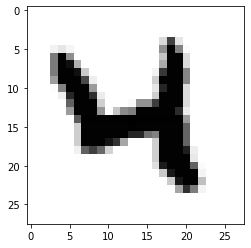

In [24]:
# Let's print some digits 
some_digit = X[20]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')

In [25]:
y[20] # indeed index 20 is a 4, string tho that's kinda weird. ok w.e.

'4'

In [26]:
y = y.astype(np.uint8)

In [27]:
# Note from description this dataset is already split into train / test w/ sufficient shuffling. 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Is 5 Detector with SGD Classifier 

In [28]:
y_train_5 = (y_train == 5) # So this should be obvious but 0s in all non 5's , 1 in all 5's
y_test_5  = (y_test  == 5)

In [29]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [30]:
sgd_clf.predict([some_digit]) # ayyy, our 4 is not a 5. 

array([False])

In [35]:
# let's try to find a 5. 
y[:25]
# looks like ind 0 and 11 are 5's 

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1], dtype=uint8)

In [36]:
sgd_clf.predict([X[0],X[11]])
# cool cool. 

array([ True,  True])